Imports you'll need. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

Load the data

In [2]:
FILE = 'tracks/albion_tracks.txt'

In [4]:
data = loadmat('labelled_trajectories/sequences_albion.mat')

In [5]:
sequences = data['sequences'][0]

In [6]:
len(sequences)

363

In [7]:
len(sequences[2])

4

Visualize the data (as points)

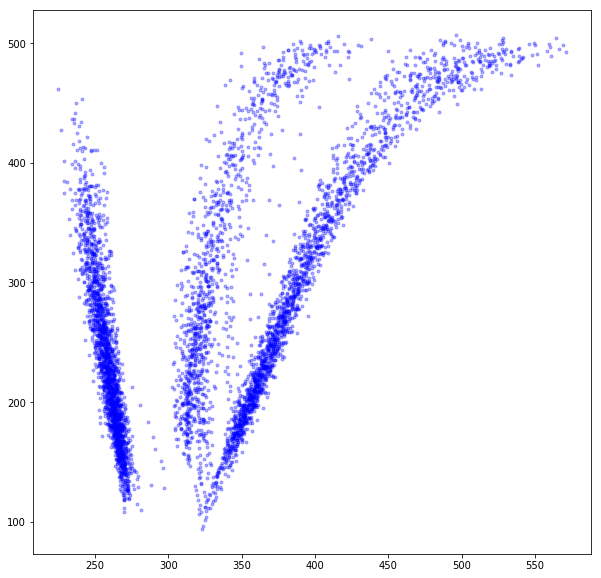

In [8]:
plt.figure(figsize=(10,10))
for n in range(0, len(sequences)):
    plt.plot(sequences[n][0], sequences[n][1], 'b.', alpha=0.3)

Visualize data (as trajectories)

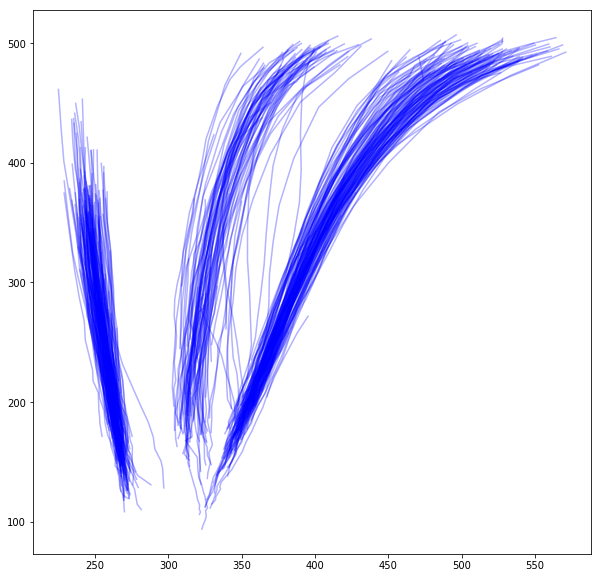

In [9]:
plt.figure(figsize=(10,10))
for n in range(0, len(sequences)):
    plt.plot(sequences[n][0], sequences[n][1], 'b-', alpha=0.3)

We need a way to transform these sequences into a "point" (of N dimensions) that captures information about the trajectory. 

We will transform each trajectory into 6 values: x_start, y_start, x_middle, y_middle, x_end, y_end. 

The property behind k-means (and other distance-based methods): if two input points (input arrays) have similar values, then they belong to the same "category" (cluster). 

In [10]:
simple_tracks = []

for s in sequences:
    x = s[0]
    y = s[1]
    l = int(x.shape[0]/2)
    
    simple_track = [x[0], x[l], x[-1], y[0], y[l], y[-1]]
    simple_tracks += [simple_track]

In [11]:
simple_tracks = np.array(simple_tracks)
simple_tracks

array([[325.878, 316.189, 362.044, 174.279, 287.439, 486.79 ],
       [354.773, 391.599, 525.056, 209.717, 320.737, 491.545],
       [343.287, 377.96 , 494.465, 170.03 , 277.398, 498.747],
       ...,
       [245.304, 265.378, 278.467, 349.368, 198.033, 135.439],
       [242.314, 257.582, 266.424, 354.059, 228.713, 167.152],
       [255.214, 264.976, 268.457, 248.225, 176.124, 141.009]])

Before, we have seen PCA. WE can apply PCA here, too. 


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(simple_tracks)
X_pca = pca.transform(simple_tracks)

In [13]:
pca.explained_variance_ratio_

array([0.89160891, 0.06375388, 0.03462745, 0.00742859])

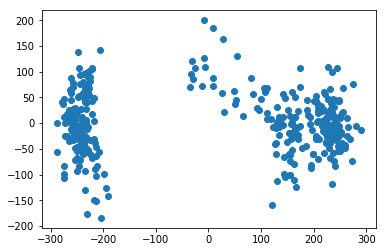

In [14]:
plt.scatter(X_pca[:,0], X_pca[:,1])

We have seen k-means before. Let's try it on this dataset

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(simple_tracks)
y_kmeans = kmeans.predict(simple_tracks)

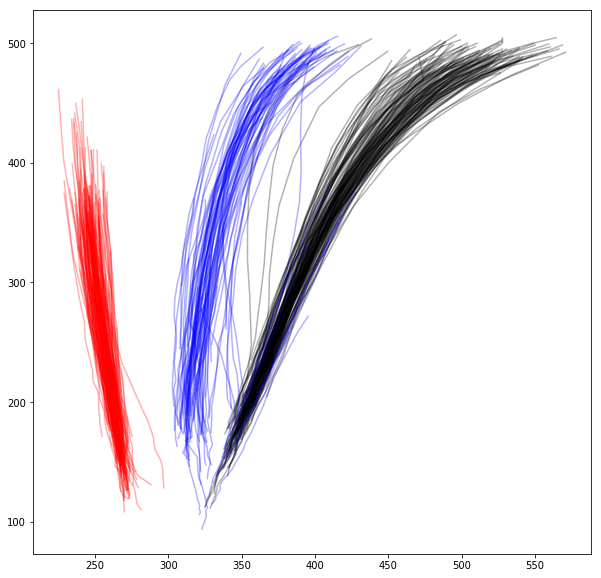

In [16]:
colors = ['b-', 'r-', 'k-']
plt.figure(figsize=(10,10))
for n in range(0, len(sequences)):
    plt.plot(sequences[n][0], sequences[n][1], colors[y_kmeans[n]], alpha=0.3)

Let's check distances to cluster centers

In [17]:
centers = kmeans.cluster_centers_

In [18]:
from scipy.spatial.distance import cdist

D = cdist(simple_tracks, centers)

In [19]:
D.shape

(363, 3)

In [20]:
idx = np.argsort(np.min(D, axis=1))[::-1]

In [21]:
idx[:10]

array([200, 157, 312, 107,  16, 290,  67,  17, 121, 264], dtype=int64)

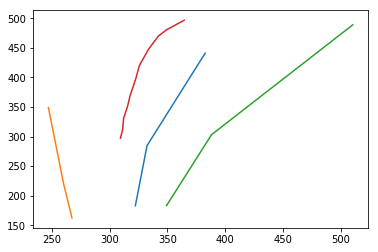

In [22]:
for c in centers:
    t = c.reshape(2, -1)
    plt.plot(t[0], t[1])
    
plt.plot(sequences[264][0], sequences[264][1])

Let's go back to PCA

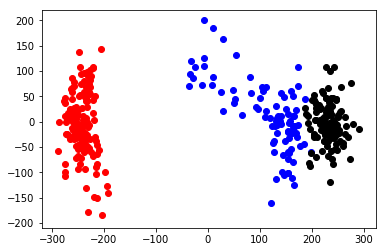

In [23]:
plt.scatter(X_pca[y_kmeans==0,0], X_pca[y_kmeans==0,1], color="Blue")
plt.scatter(X_pca[y_kmeans==1,0], X_pca[y_kmeans==1,1], color="Red")
plt.scatter(X_pca[y_kmeans==2,0], X_pca[y_kmeans==2,1], color="Black")